In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv(r'D:\Machine learning\dataset\20_newsgroups.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18846 non-null  object
 1   target  18846 non-null  object
dtypes: object(2)
memory usage: 294.6+ KB


Missing values in each column:
 text      0
target    0
dtype: int64

Distribution of target classes:
 target
rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: count, dtype: int64

First few rows of the dataframe:
                                                 text                    target
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...          rec.sport.hockey
1  From: mblawson@midway.ecn.uo

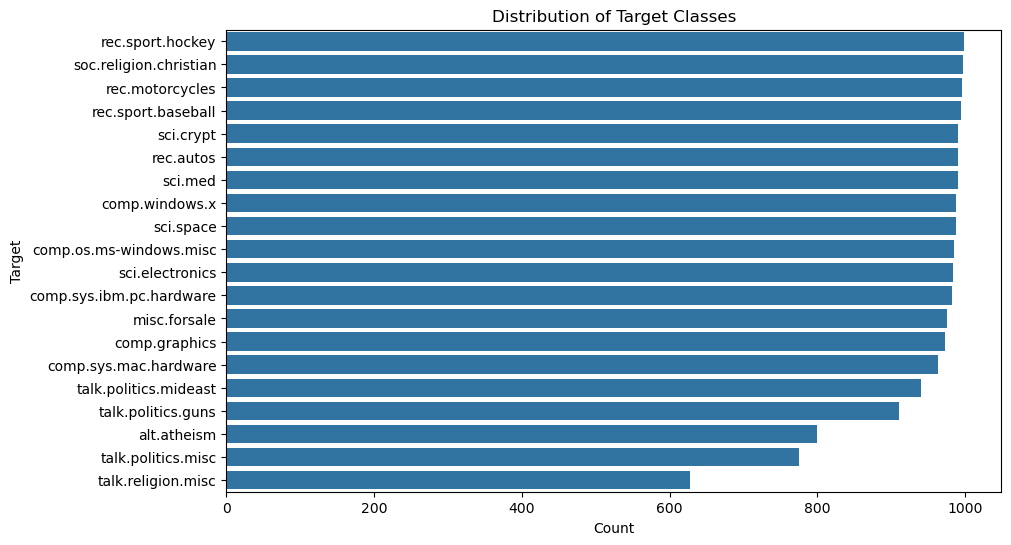


Statistics of text length:
 count     18846.000000
mean       1902.525894
std        3984.970264
min         115.000000
25%         751.000000
50%        1175.000000
75%        1874.750000
max      160616.000000
Name: text_length, dtype: float64


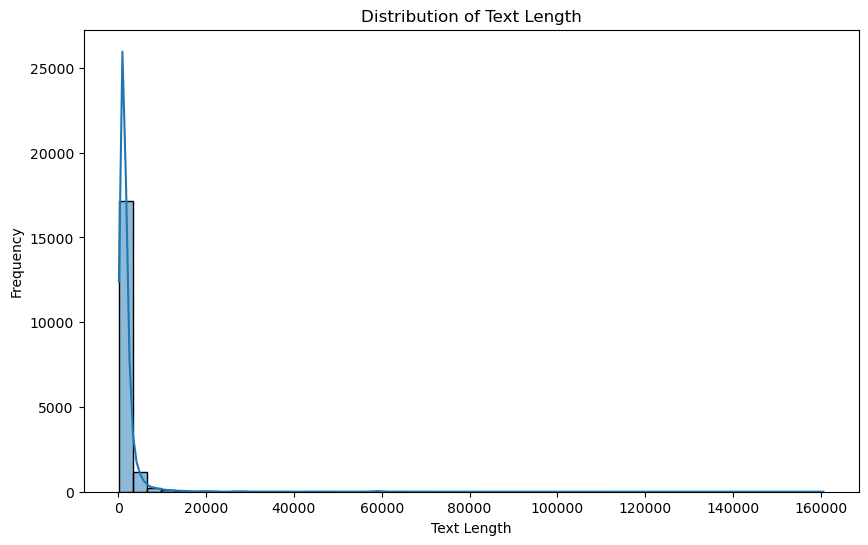

In [4]:
import seaborn as sns

# Data Analysis and Pre-processing

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check the distribution of target classes
target_distribution = df['target'].value_counts()
print("\nDistribution of target classes:\n", target_distribution)

# Display the first few rows of the dataframe
print("\nFirst few rows of the dataframe:\n", df.head())

# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

# Plot the distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(y='target', data=df, order=df['target'].value_counts().index)
plt.title('Distribution of Target Classes')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

# Display the length of text in each message
df['text_length'] = df['text'].apply(len)
print("\nStatistics of text length:\n", df['text_length'].describe())

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [5]:

# Step 2: Split the data into features (X) and labels (y)
X = df['text']
y = df['target']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# # Sttorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)
# ep 4: Convert messages to numerical features using CountVectorizer (Bag of Words)
# vectorizer = CountVectorizer(stop_words='english')
# X_train_vec
# # Step 5: Train the Naive Bayes classifier
# naive_bayes_model = MultinomialNB()
# naive_bayes_model.fit(X_train_vectorized, y_train)




# Step 2: Convert messages to numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 3: Train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

# # Optional: To predict on the test set
# predictions = naive_bayes_model.predict(X_test_vectorized)


MultinomialNB()

In [9]:

# Step 6: Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

Accuracy: 0.8745
Confusion Matrix:
[[138   0   0   0   0   0   0   0   0   0   0   0   1   0   1   4   1   0
    3   3]
 [  0 186   0   5   0   3   0   0   1   0   0   2   0   1   1   1   0   2
    0   0]
 [  0  38  69  46   6  25   0   3   0   0   0   3   3   0   0   0   0   0
    2   0]
 [  0  11   0 157   8   1   0   1   0   0   1   1   0   1   1   0   0   0
    1   0]
 [  0   1   1   9 185   1   2   1   0   0   0   2   2   0   1   0   0   0
    0   0]
 [  0  21   0   5   2 182   0   0   0   1   0   0   0   1   2   0   1   0
    0   0]
 [  0   4   0  24   5   0 135   9   1   1   3   0   4   1   1   0   2   1
    2   0]
 [  0   1   0   0   0   0   2 187   2   0   0   0   2   1   0   0   1   0
    0   0]
 [  0   0   0   1   0   0   4   2 158   0   0   0   1   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   0   0   1 203   5   0   0   0   0   1   0   0
    1   0]
 [  0   2   0   1   0   0   0   0   1   1 193   0   0   0   0   0   0   0
    0   0]
 [  0   4   1   0   0   0   0 

In [12]:



# Step 8: Predict on a new document
sample_message = [ 'Open to the public', 'I am selling my car']
sample_vectorized = vectorizer.transform(sample_message)
sample_prediction = naive_bayes_model.predict(sample_vectorized)

# Output the predictions for the sample messages
for msg, pred in zip(sample_message, sample_prediction):
    print(f'The message: "{msg}" is classified as: {pred}')


The message: "Open to the public" is classified as: sci.crypt
The message: "I am selling my car" is classified as: rec.autos


In [11]:
import gradio as gr

def predict_newsgroup(text):
  """Predicts the newsgroup category for a given text."""
  text_vectorized = vectorizer.transform([text])
  prediction = naive_bayes_model.predict(text_vectorized)[0]
  return prediction


iface = gr.Interface(
    fn=predict_newsgroup,
    # Use gr.Textbox directly instead of gr.inputs.Textbox
    inputs=gr.Textbox(lines=5, label="Enter News Text"), 
    outputs="text",
    title="20 Newsgroups Classifier",
    description="Enter some text and the model will predict which newsgroup it belongs to.",
)

iface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


Exception in thread Thread-8 (_do_normal_analytics_request):
Traceback (most recent call last):
  File "c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\httpcore\_exceptions.py", line 10, in map_exceptions
    yield
  File "c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\httpcore\_backends\sync.py", line 168, in start_tls
    raise exc
  File "c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\httpcore\_backends\sync.py", line 163, in start_tls
    sock = ssl_context.wrap_socket(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hp\miniconda3\envs\machine_learning\Lib\ssl.py", line 455, in wrap_socket
    return self.sslsocket_class._create(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hp\miniconda3\envs\machine_learning\Lib\ssl.py", line 1042, in _create
    self.do_handshake()
  File "c:\Users\Hp\miniconda3\envs\machine_learning\Lib\ssl.py", line 1320, in do_handshake
    self._sslobj.do_handshake()
TimeoutError: _ssl.c:983: Th

In [13]:
X_test.value_counts()

text
From: shippert@cco.caltech.edu (Tim Shippert)\nSubject: Re: Infield Fly Rule\nOrganization: California Institute of Technology, Pasadena\nLines: 25\nNNTP-Posting-Host: sandman.caltech.edu\n\njrogoff@scott.skidmore.edu (jay rogoff) writes:\n\n>One last infield fly question that has always puzzled me and hasn't\n>yet been addressed.  I believe the rule also does *not* deal with this\n>situation:\n\n>However, if the Infield Fly is *not* caught, at what point can a runner\n>legally leave his base w/o fear of being doubled off for advancing too\n>early?  \n\n\tThe runner can leave his base at any time.  If the ball is caught,\nhe's got to tag up.  If it isn't caught, he _doesn't_ have to tag up at\nall.  So, if he's feeling lucky, your runner at second can sprint for glory\nas soon as the ball is popped up.  If it isn't caught, he's probably scored\na run.  If it is, he's probably headed for AAA.  \n\n\tThe only effect the infield fly has is to make the batter out,\nthereby removing th